In [ ]:
## 环境
import sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["NUMBA_NUM_THREADS"] = "64"
os.environ["NUMBA_THREADING_LAYER"] = "omp"
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

## 基础
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')

## 必要库
from threeML import *
try:
    from hawc_hal import HAL, HealpixConeROI, HealpixMapROI
except:
    from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import mylib as my
from importlib import reload

##可选
# from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
# from threeML.utils.progress_bar import trange
# from tqdm import tqdm
# from astropy.io import fits
# from astropy.wcs import WCS
# from astropy.coordinates import SkyCoord
# from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
# from astropy.coordinates import Angle
import healpy as hp
# import traceback

## 警告
# import warnings
# np.seterr(all="ignore")
np.seterr(divide="ignore")
# warnings.simplefilter("ignore")
# silence_warnings()
# silence_logs()
# quiet_mode()
# loud_mode()
# debug_mode()

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# you can do some change about the lib and reload it any time.
reload(my)

Load sub from Mystat: : 40it [00:04,  8.60it/s]]
Load sub from Mystat: : 40it [00:00, 182.26it/s]                            

Yourlib init successfully!!!


<module 'mylib' from '/data/home/cwy/Science/3MLWCDA/Standard/src/mylib/__init__.py'>

16:32:45 INFO      Using transits contained in maptree                                                    ]8;id=95823;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=468547;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#78\78]8;;\

         INFO      Reading Maptree!                                                           ]8;id=932869;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/maptree/from_root_file.py\from_root_file.py]8;;\:]8;id=531318;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/maptree/from_root_file.py#218\218]8;;\

16:32:57 INFO      Using transits contained in maptree                                                    ]8;id=140213;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=625911;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#78\78]8;;\

         INFO      Reading Maptree!                                                           ]8;id=553426;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/maptree/from_root_file.py\from_root_file.py]8;;\:]8;id=856690;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/maptree/from_root_file.py#218\218]8;;\

16:33:16 INFO      Region of Interest:                                                                   ]8;id=953349;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=938399;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#342\342]8;;\

         INFO      -------------------                                                                   ]8;id=148115;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=103202;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#343\343]8;;\

         INFO      HealpixConeROI: Center (R.A., Dec) = (83.630, 22.020), data radius =      ]8;id=975475;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/region_of_interest/healpix_cone_roi.py\healpix_cone_roi.py]8;;\:]8;id=446005;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/region_of_interest/healpix_cone_roi.py#87\87]8;;\
                  6.000 deg, model radius: 15.000 deg                                                              

         INFO                                                                                            ]8;id=339899;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=425924;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#346\346]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=619808;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=60293;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#347\347]8;;\

         INFO      --------------------                                                                  ]8;id=481789;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=612982;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#348\348]8;;\

         INFO      Width x height 178 x 178 px                                                           ]8;id=778469;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=496388;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#350\350]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=918223;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=967024;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#355\355]8;;\

         INFO                                                                                            ]8;id=436534;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=933714;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#358\358]8;;\

         INFO      Response:                                                                             ]8;id=141116;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=307907;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#359\359]8;;\

         INFO      ---------                                                                             ]8;id=821961;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=636449;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#360\360]8;;\

         INFO      Response file:                                                                   ]8;id=214913;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/response/response.py\response.py]8;;\:]8;id=686784;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/response/response.py#556\556]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_20240131_hscpsf_mc                
                  .root                                                                                            

         INFO      Number of dec bins: 120                                                          ]8;id=100298;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/response/response.py\response.py]8;;\:]8;id=759815;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/response/response.py#557\557]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 7                                 ]8;id=343587;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/response/response.py\response.py]8;;\:]8;id=998947;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/response/response.py#561\561]8;;\

         INFO                                                                                            ]8;id=56737;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=428996;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#364\364]8;;\

         INFO      Map Tree:                                                                             ]8;id=171744;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=504092;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#365\365]8;;\

         INFO      ----------                                                                            ]8;id=341237;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=405025;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#366\366]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,2.884156e+08,2.880460e+08,1.001283,34461,112.980072
1,1,1024,RING,6.065269e+07,6.041455e+07,1.003942,34461,112.980072
2,2,1024,RING,1.104007e+07,1.089833e+07,1.013005,34461,112.980072
3,3,1024,RING,1.186256e+06,1.142965e+06,1.037876,34461,112.980072
4,4,1024,RING,4.424898e+05,4.161349e+05,1.063332,34461,112.980072
5,5,1024,RING,6.513125e+04,5.726578e+04,1.137350,34461,112.980072
6,6,1024,RING,3.904075e+04,3.592289e+04,1.086793,34461,112.980072


         INFO      This Map Tree contains 1132.600 transits in the first bin                        ]8;id=329805;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=805621;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/maptree/map_tree.py#156\156]8;;\

         INFO      Total data size: 3.86 Mb                                                         ]8;id=44559;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=83285;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/maptree/map_tree.py#160\160]8;;\

         INFO                                                                                            ]8;id=504196;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=963671;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#370\370]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=412893;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=88569;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#372\372]8;;\

         INFO      -------------------------------                                                       ]8;id=830164;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=257718;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#373\373]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=323712;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=287209;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#374\374]8;;\

         INFO      Region of Interest:                                                                   ]8;id=217649;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=966065;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#342\342]8;;\

         INFO      -------------------                                                                   ]8;id=285407;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=442899;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#343\343]8;;\

         INFO      HealpixConeROI: Center (R.A., Dec) = (83.630, 22.020), data radius =      ]8;id=264049;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/region_of_interest/healpix_cone_roi.py\healpix_cone_roi.py]8;;\:]8;id=631546;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/region_of_interest/healpix_cone_roi.py#87\87]8;;\
                  6.000 deg, model radius: 15.000 deg                                                              

         INFO                                                                                            ]8;id=408623;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=630541;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#346\346]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=829905;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=369380;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#347\347]8;;\

         INFO      --------------------                                                                  ]8;id=335781;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=627482;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#348\348]8;;\

         INFO      Width x height 178 x 178 px                                                           ]8;id=616613;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=952550;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#350\350]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=142368;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=902618;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#355\355]8;;\

         INFO                                                                                            ]8;id=487508;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=29531;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#358\358]8;;\

         INFO      Response:                                                                             ]8;id=549473;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=117754;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#359\359]8;;\

         INFO      ---------                                                                             ]8;id=676001;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=921510;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#360\360]8;;\

         INFO      Response file:                                                                   ]8;id=107099;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/response/response.py\response.py]8;;\:]8;id=851292;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/response/response.py#556\556]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A_DR_xsq.root                          

         INFO      Number of dec bins: 110                                                          ]8;id=448239;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/response/response.py\response.py]8;;\:]8;id=777626;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/response/response.py#557\557]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=691614;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/response/response.py\response.py]8;;\:]8;id=603577;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/response/response.py#561\561]8;;\

         INFO                                                                                            ]8;id=870040;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=746664;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#364\364]8;;\

         INFO      Map Tree:                                                                             ]8;id=20065;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=936225;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#365\365]8;;\

         INFO      ----------                                                                            ]8;id=525050;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=631277;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#366\366]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,3.734501e+06,3.714263e+06,1.005449,34461,112.980072
1,1,1024,RING,7.595275e+06,7.546825e+06,1.006420,34461,112.980072
2,2,1024,RING,4.092854e+06,4.047013e+06,1.011327,34461,112.980072
3,3,1024,RING,1.138128e+06,1.113246e+06,1.022352,34461,112.980072
4,4,1024,RING,1.029494e+05,9.373645e+04,1.098285,34461,112.980072
5,5,1024,RING,1.859325e+04,1.494752e+04,1.243902,34461,112.980072
6,6,1024,RING,9.963699e+03,7.924110e+03,1.257390,34461,112.980072
7,7,1024,RING,2.330990e+03,1.629017e+03,1.430918,34461,112.980072
8,8,1024,RING,7.053900e+02,4.736132e+02,1.489380,34461,112.980072
9,9,1024,RING,2.158500e+02,1.758962e+02,1.227144,34461,112.980072


         INFO      This Map Tree contains 1570.300 transits in the first bin                        ]8;id=407447;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=534755;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/maptree/map_tree.py#156\156]8;;\

         INFO      Total data size: 7.72 Mb                                                         ]8;id=571153;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=734915;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/maptree/map_tree.py#160\160]8;;\

         INFO                                                                                            ]8;id=686165;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=963368;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#370\370]8;;\

         INFO      Active energy/nHit planes (14):                                                       ]8;id=10269;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=363177;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#372\372]8;;\

         INFO      -------------------------------                                                       ]8;id=491609;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=783446;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#373\373]8;;\

         INFO      ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']            ]8;id=999718;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py\HAL.py]8;;\:]8;id=387382;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/HAL.py#374\374]8;;\

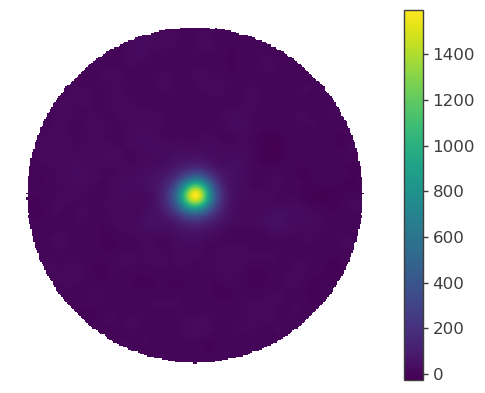

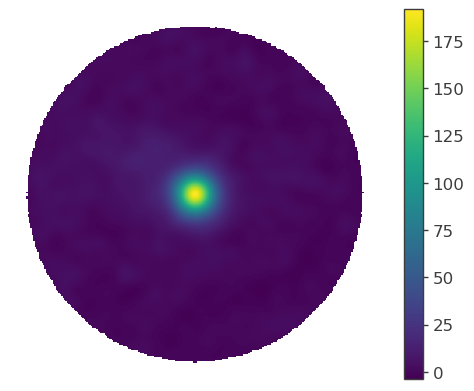

In [8]:
#####   Data Initialize

# maptree = "../../data/gcd_new.root"
# maptree = "../../data/20210305_20230731_ihep_goodlist.root"
# maptree = "../../data/20210305-20230731_trans_fromhsc.root"
# response = "../../data/DR_ihep_MK2_newoldDRpsf.root"
# response = "../../data/WCDA_DR_psf.root"
# response = "../../data/DR_ihep_MK2.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"
maptree = "../../data/20240731_hsc_out.root"
response="../../data/DR_ihep_20240131_hscpsf_mc.root"

# maptree2 = "../../data/KM2A_all_final.root" #old catalog
# response2 = "../../data/KM2A_DR_all.root"

# maptree2 = "../../data/KM2A1234full_skymap_rcy.root"
# response2 = "../../data/KM2A1234full_mcpsf_DRfinal.root"

maptree2 = "../../data/KM2A_20240731_xsq_out.root"
response2 = "../../data/KM2A_DR_xsq.root"

region_name="Crab_jf_241113"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')
    
ra_crab, dec_crab = 83.63,22.02
ra1,dec1=ra_crab, dec_crab

data_radius = 6.0
model_radius = 15.0
roi=HealpixConeROI(ra=ra1,dec=dec1,data_radius=data_radius,model_radius=model_radius)  
WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.17)
KM2A = HAL("KM2A", maptree2, response2, roi, flat_sky_pixels_size=0.17)

#####   Data Situation
%matplotlib inline
WCDA.set_active_measurements(0, 5)
WCDA.display()

KM2A.set_active_measurements(0, 13)
KM2A.display()

fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
fig.show()
fig.savefig(f"../res/{region_name}/counts_all_wcda.png",dpi=300)

fig = KM2A.display_stacked_image(smoothing_kernel_sigma=0.25)
fig.show()
fig.savefig(f"../res/{region_name}/counts_all_km2a.png",dpi=300)

In [4]:
Modelname="1pt+1gaus+GDE"  # Name your model now to facilitate the creation of record folders by the program.
if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
    os.system(f'mkdir ../res/{region_name}/{Modelname}/')


#Without extended parameter settings, it's a point source. When you set the corresponding extension, it becomes the respective source.
# crab = my.setsorce("crab",ra1,dec1, fitrange=1,
#                 indexb=(-10,-1), kb=(1e-14, 1e-8), # only index, means its powerlaw
#                 )

crab = my.setsorce("crab",ra1,dec1, fitrange=1, alpha=-2.6,beta=0.1, piv=20,
                spec=Log_parabola()  # or you can specify    
                )
# crab2 = my.setsorce("crab2",ra1,dec1, fitrange=0.5, indexb=(-10,-1), kb=(1e-14, 1e-8)
#                 )

ext1 = my.setsorce("ext1",85.5,23.5, fitrange=1, sigma=1, sb=(0,3), piv=20, # indexb=(-10,1),
                kb=(1e-15, 1e-8), alpha=-2.6, beta=0.1, spec=Log_parabola()
                )

Diffuse = my.set_diffusebkg(
                ra1=ra1, dec1=dec1, lr=data_radius, br=data_radius, 
                K = 3.3e-13, index = -2.3, alpha=-2.6,beta=0.1, spec=Log_parabola(), piv=20,
                Kf=False, indexf=False
                )

lm = Model(crab, ext1, Diffuse) #crab2,

with open(f'../res/{region_name}/{Modelname}/Model_init.txt', 'w') as f:
    for key, value in lm.parameters.items():
        f.write(f'{key}: {value}\n')

lm.display(complete=True)

16:02:00 WARNING   We have set the min_value of ext1.spectrum.main.Log_parabola.K to 1e-99 because ]8;id=244780;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=230179;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#694\694]8;;\
                  there was a postive transform                                                                    

         INFO      Set diffuse range: [178.55125051638905, 190.55125051638905] [-11.783826753163167,  ]8;id=18455;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=691712;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2061\2061]8;;\
                  11.783826753163167]                                                                              

         INFO      ra dec coner:                                                                      ]8;id=607035;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=802430;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2062\2062]8;;\

         INFO      (74.6254758138579, 23.50653979929928)                                              ]8;id=80020;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=653152;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2063\2063]8;;\

         INFO      (81.62565414718594, 13.80439627160609)                                             ]8;id=589206;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=233855;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2064\2064]8;;\

         INFO      (103.6058630018385, 25.141153852932412)                                            ]8;id=438935;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=215374;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2065\2065]8;;\

         INFO      (97.88578877849, 35.80973873260664)                                                ]8;id=778940;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=689123;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2066\2066]8;;\

16:02:01 INFO      total sr: 0.08530117677825022                                                      ]8;id=383839;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=361633;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2105\2105]8;;\
                  ratio: 0.031064777609331098                                                                      

         INFO      integration: 4.1799421553891025e-06                                                ]8;id=322733;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=892707;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2106\2106]8;;\
                  ratio: 0.03298625241356888                                                                       

         INFO      set K to: 3.3e-13                                                                  ]8;id=664534;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=8702;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2107\2107]8;;\

         INFO      diffuse file path: ../../data/None_dust_bkg_template.fits                          ]8;id=836784;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=301890;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2134\2134]8;;\

         WARNING   We have set the min_value of Diffuse.spectrum.main.Log_parabola.K to 1e-99      ]8;id=700218;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=523360;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#694\694]8;;\
                  because there was a postive transform                                                            

Model summary:
==============

                  N
Point sources     1
Extended sources  2
Particle sources  0

Free parameters (14):
--------------------

                                          value min_value max_value  \
crab.position.ra                          83.63     82.63     84.63   
crab.position.dec                         22.02     21.02     23.02   
crab.spectrum.main.Log_parabola.K           0.0       0.0  100000.0   
crab.spectrum.main.Log_parabola.alpha      -2.6      None      None   
crab.spectrum.main.Log_parabola.beta        0.1      None      None   
ext1.Gaussian_on_sphere.lon0               85.5      84.5      86.5   
ext1.Gaussian_on_sphere.lat0               23.5      22.5      24.5   
ext1.Gaussian_on_sphere.sigma               1.0       0.0       3.0   
ext1.spectrum.main.Log_parabola.K           0.0       0.0       0.0   
ext1.spectrum.main.Log_parabola.alpha      -2.6      None      None   
ext1.spectrum.main.Log_parabola.beta        0.1      None      None   
Diffuse.spectrum.main.Log_parabola.K        0.0       0.0       0.0   
Diffuse.spectrum.main.Log_parabola.alpha   -2.6      None      None   
Diffuse.spectrum.main.Log_parabola.beta     0.1      None      None   

                                                    unit  
crab.position.ra                                     deg  
crab.position.dec                                    deg  
crab.spectrum.main.Log_parabola.K         keV-1 s-1 cm-2  
crab.spectrum.main.Log_parabola.alpha                     
crab.spectrum.main.Log_parabola.beta                      
ext1.Gaussian_on_sphere.lon0                         deg  
ext1.Gaussian_on_sphere.lat0                         deg  
ext1.Gaussian_on_sphere.sigma                        deg  
ext1.spectrum.main.Log_parabola.K         keV-1 s-1 cm-2  
ext1.spectrum.main.Log_parabola.alpha                     
ext1.spectrum.main.Log_parabola.beta                      
Diffuse.spectrum.main.Log_parabola.K      keV-1 s-1 cm-2  
Diffuse.spectrum.main.Log_parabola.alpha                  
Diffuse.spectrum.main.Log_parabola.beta                   

Fixed parameters (6):
---------------------

                                                                                    value  \
crab.spectrum.main.Log_parabola.piv                                         20000000000.0   
ext1.spectrum.main.Log_parabola.piv                                         20000000000.0   
Diffuse.SpatialTemplate_2D.K                                                          1.0   
Diffuse.SpatialTemplate_2D.hash         1253604770507155902315933312480749469901943358...   
Diffuse.SpatialTemplate_2D.ihdu                                                       0.0   
Diffuse.spectrum.main.Log_parabola.piv                                      20000000000.0   

                                       min_value max_value   unit  
crab.spectrum.main.Log_parabola.piv         None      None    keV  
ext1.spectrum.main.Log_parabola.piv         None      None    keV  
Diffuse.SpatialTemplate_2D.K                None      None  deg-2  
Diffuse.SpatialTemplate_2D.hash             None      None         
Diffuse.SpatialTemplate_2D.ihdu              0.0      None         
Diffuse.spectrum.main.Log_parabola.piv      None      None    keV  

Properties (2):
--------------------

                                                                       value  \
Diffuse.SpatialTemplate_2D.fits_file  ../../data/None_dust_bkg_template.fits   
Diffuse.SpatialTemplate_2D.frame                                        icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                  None  
Diffuse.SpatialTemplate_2D.frame      [icrs, galactic, fk5, fk4, fk4_no_e]  

Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

16:02:01 INFO      Considering 16 dec bins for extended source ext1                ]8;id=552366;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=773605;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

16:02:02 INFO      Central bin is bin at Declination = 23.500                      ]8;id=174235;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=461644;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 25 dec bins for extended source Diffuse             ]8;id=218457;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=268405;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 24.747                      ]8;id=981723;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=75384;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 16 dec bins for extended source ext1                ]8;id=653181;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=91040;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.500                      ]8;id=155359;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=161470;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 25 dec bins for extended source Diffuse             ]8;id=35905;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=822139;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 24.747                      ]8;id=290632;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=669120;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=393110;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=15441;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=488673;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=418201;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1076\1076]8;;\

16:14:12 WARNING   These parameters returned a logLike = Nan: [ 83.63437102  22.01314841   ]8;id=435234;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=557226;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1007\1007]8;;\
                  -22.93249038  -3.06004458   0.11127537                                                           
                    85.77944432  23.28022113   0.73466308 -23.31071343  -2.24399499                                
                     1.22179361 -23.95402632   0.35474955  -3.23369878]                                            

16:16:36 WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 84.5.   ]8;id=208471;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=230624;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 22.5.   ]8;id=927584;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=893045;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 3.0.  ]8;id=534536;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=824130;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 1e-17.     ]8;id=703269;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=65815;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=636190;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=152381;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  3.3000000000000003e-19.                                                                          

Best fit values:

,result,unit
parameter,,
crab.position.ra,(8.36344 +/- 0.00010) x 10,deg
crab.position.dec,(2.20133 +/- 0.00009) x 10,deg
crab.spectrum.main.Log_parabola.K,(1.168 +/- 0.008) x 10^-23,1 / (cm2 keV s)
crab.spectrum.main.Log_parabola.alpha,-3.061 +/- 0.005,
crab.spectrum.main.Log_parabola.beta,(1.108 +/- 0.016) x 10^-1,
ext1.Gaussian_on_sphere.lon0,(8.587 +/- 0.005) x 10,deg
ext1.Gaussian_on_sphere.lat0,(2.327 +/- 0.004) x 10,deg
ext1.Gaussian_on_sphere.sigma,(9.7 +/- 0.4) x 10^-1,deg
ext1.spectrum.main.Log_parabola.K,(5.29 -0.31 +0.33) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00,-0.01,0.01,-0.00,0.01,0.01,0.02,-0.02,-0.02,0.01,0.01,0.01,0.01,0.01
-0.01,1.00,0.01,0.00,-0.00,0.01,0.00,-0.01,-0.00,0.00,0.01,0.00,0.00,0.00
0.01,0.01,1.00,0.53,-0.08,0.03,0.04,-0.05,-0.03,-0.00,0.01,-0.00,0.01,-0.01
-0.00,0.00,0.53,1.00,-0.87,0.02,0.02,-0.05,-0.03,-0.01,-0.00,0.02,-0.00,0.02
0.01,-0.00,-0.08,-0.87,1.00,-0.00,-0.01,0.03,0.03,0.01,0.01,-0.03,-0.00,-0.04
0.01,0.01,0.03,0.02,-0.00,1.00,0.11,0.34,0.29,-0.16,-0.07,-0.21,-0.04,-0.10
0.02,0.00,0.04,0.02,-0.01,0.11,1.00,-0.05,0.00,-0.13,-0.06,-0.02,0.02,-0.02
-0.02,-0.01,-0.05,-0.05,0.03,0.34,-0.05,1.00,0.70,-0.14,-0.13,-0.48,-0.17,-0.21
-0.02,-0.00,-0.03,-0.03,0.03,0.29,0.00,0.70,1.00,-0.31,0.16,-0.51,-0.07,-0.29
0.01,0.00,-0.00,-0.01,0.01,-0.16,-0.13,-0.14,-0.31,1.00,0.60,0.20,-0.18,0.12
0.01,0.01,0.01,-0.00,0.01,-0.07,-0.06,-0.13,0.16,0.60,1.00,0.17,0.01,-0.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
KM2A,9770.028435
WCDA,17441.828630
total,27211.857065


Values of statistical measures:

,statistical measures
AIC,54451.714711
BIC,54612.603614


         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 84.5.   ]8;id=306133;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=140475;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 22.5.   ]8;id=269215;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=790674;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 3.0.  ]8;id=323252;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=163733;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 1e-17.     ]8;id=323664;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=301565;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=446495;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=620579;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  3.3000000000000003e-19.                                                                          

Smoothing planes:   0%|          | 0/7 [00:00<?, ?it/s]

Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

16:16:48 WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 84.5.   ]8;id=180783;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=565579;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 22.5.   ]8;id=588238;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=378269;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 3.0.  ]8;id=903971;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=701314;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 1e-17.     ]8;id=318810;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=414571;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=365642;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=623962;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  3.3000000000000003e-19.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 84.5.   ]8;id=329457;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=965411;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 22.5.   ]8;id=169735;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=942321;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 3.0.  ]8;id=342626;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=800533;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 1e-17.     ]8;id=320070;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=68609;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=922121;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=606194;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  3.3000000000000003e-19.                                                                          

,value,negative_error,positive_error,error,unit
crab.position.ra,8.363444e+01,-1.032330e-03,1.032593e-03,1.032462e-03,deg
crab.position.dec,2.201334e+01,-9.416241e-04,9.261376e-04,9.338808e-04,deg
crab.spectrum.main.Log_parabola.K,1.168326e-23,-7.800410e-26,7.760946e-26,7.780678e-26,1 / (cm2 keV s)
crab.spectrum.main.Log_parabola.alpha,-3.061448e+00,-5.302080e-03,5.353035e-03,5.327557e-03,
crab.spectrum.main.Log_parabola.beta,1.107718e-01,-1.489666e-03,1.489930e-03,1.489798e-03,
ext1.Gaussian_on_sphere.lon0,8.587312e+01,-4.937681e-02,4.877217e-02,4.907449e-02,deg
ext1.Gaussian_on_sphere.lat0,2.327174e+01,-3.637368e-02,3.561430e-02,3.599399e-02,deg
ext1.Gaussian_on_sphere.sigma,9.738021e-01,-4.008931e-02,3.804485e-02,3.906708e-02,deg
ext1.spectrum.main.Log_parabola.K,5.288574e-24,-3.114594e-25,3.235519e-25,3.175056e-25,1 / (cm2 keV s)
ext1.spectrum.main.Log_parabola.alpha,-2.368832e+00,-6.436170e-02,6.835592e-02,6.635881e-02,


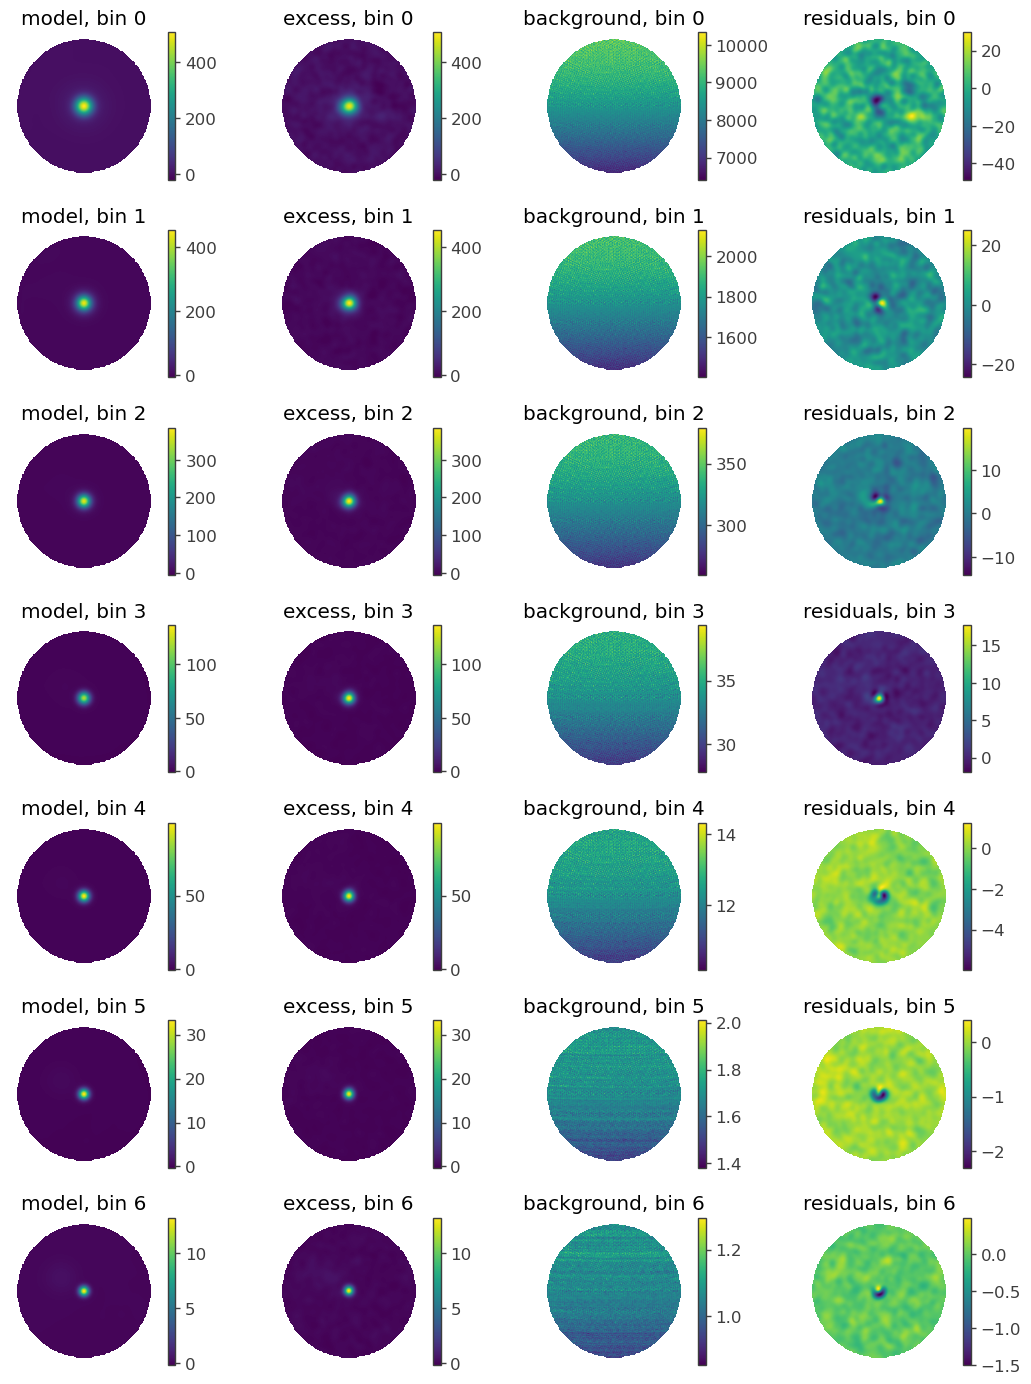

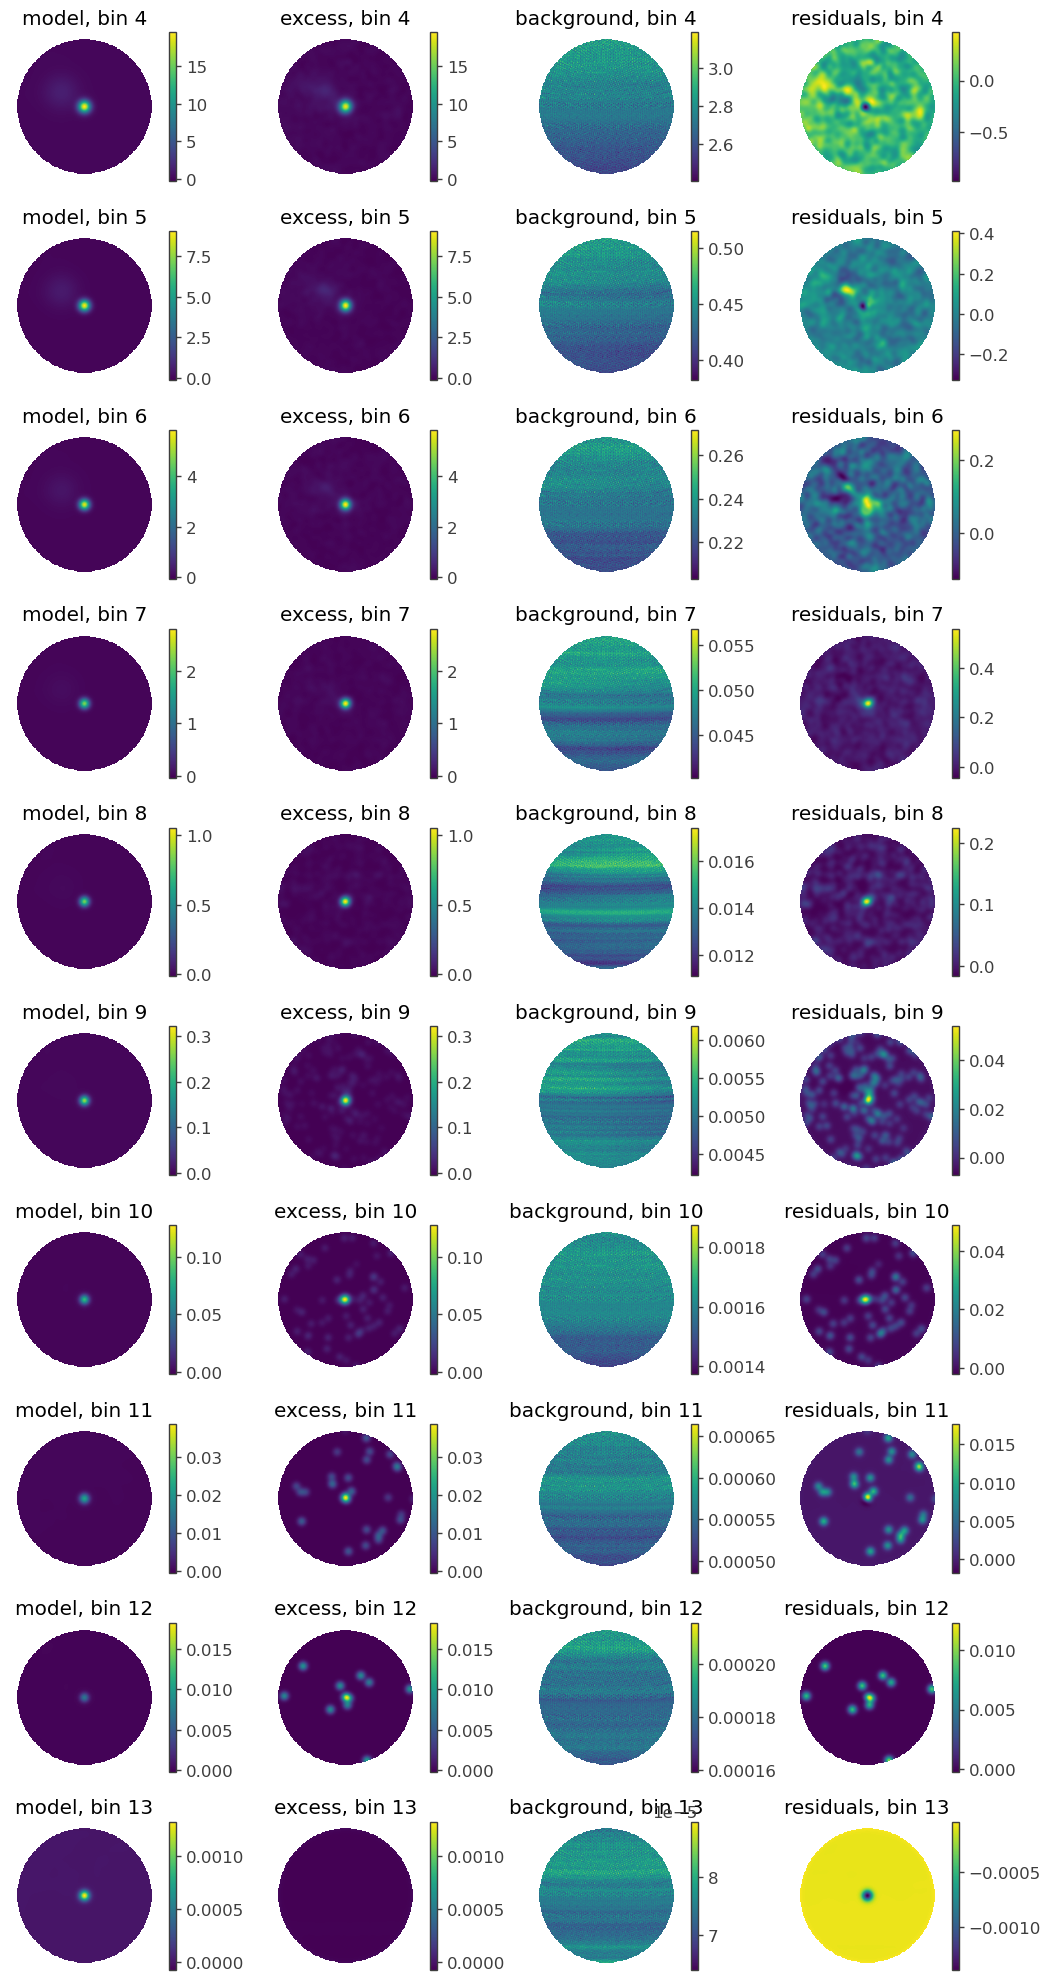

In [5]:
# Attempt the fitting; it will take approximately two minutes.
result = my.jointfit(region_name, Modelname, [WCDA,KM2A], lm, [0,4], [6,13], mini="ROOT")
sources = my.get_sources(lm,result)
result[1][0]
# result[0].get_contours(J0248.Gaussian_on_sphere.lon0,39.88,44.88,30)

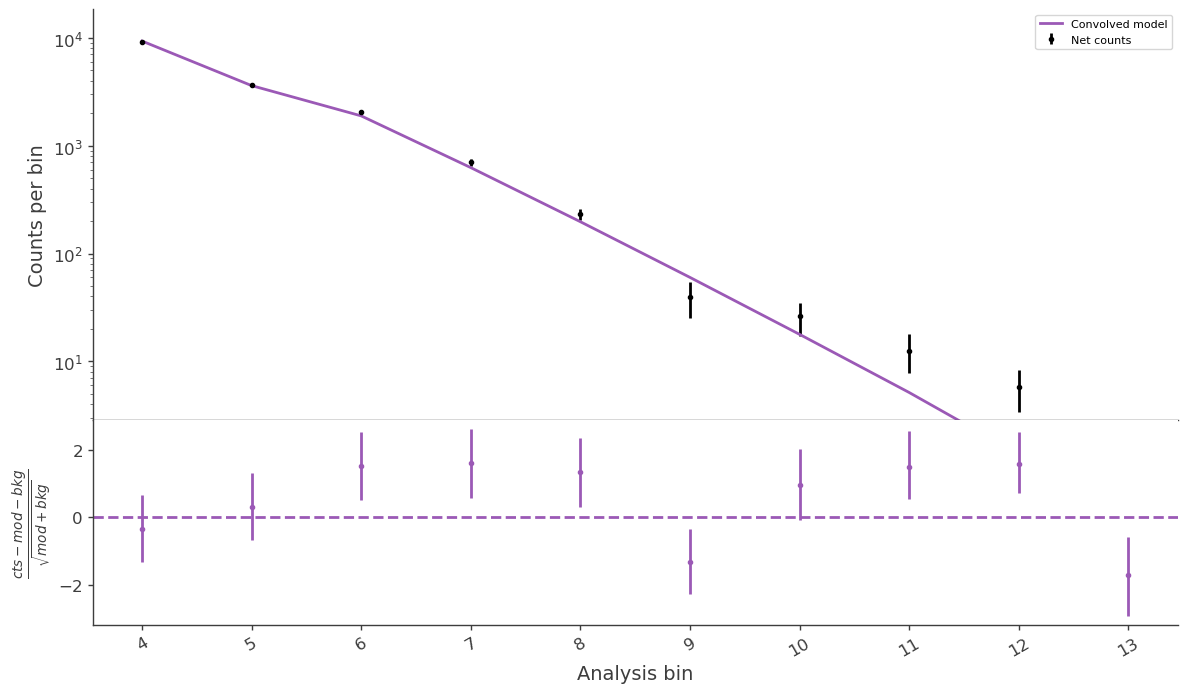

In [5]:
fig = KM2A.display_spectrum()

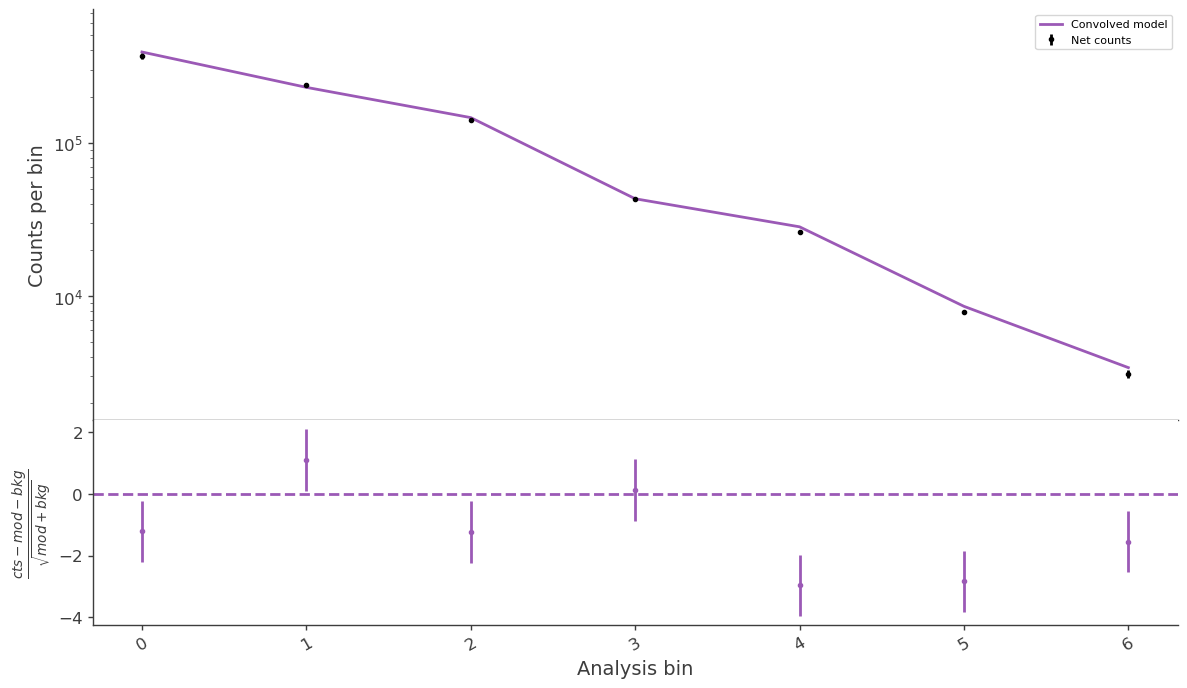

In [6]:
fig = WCDA.display_spectrum()

In [7]:
# Compute Ts,  it will take approximately five minutes.
TSlist = ["crab", "ext1", "Diffuse"]  # A list put the sources that you want to compute TS
TS, TSresults = my.getTSall(TSlist, region_name, Modelname, result, WCDA)
TSresults


100%|██████████| 3/3 [00:00<00:00, 16029.19it/s]


14:52:53 INFO      TS_all: 281180.8060401373                                                          ]8;id=435016;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=710456;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1620\1620]8;;\

         INFO      llh_all: -17441.9232550049                                                         ]8;id=647751;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=709460;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1622\1622]8;;\

14:52:54 INFO      Considering 15 dec bins for extended source ext1                ]8;id=740409;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=39675;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.272                      ]8;id=268975;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=55973;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 24 dec bins for extended source Diffuse             ]8;id=249236;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=18515;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 26.761                      ]8;id=267826;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=790739;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 15 dec bins for extended source ext1                ]8;id=698134;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=819418;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.272                      ]8;id=218992;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=27252;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 24 dec bins for extended source Diffuse             ]8;id=331048;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=638428;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 26.761                      ]8;id=359491;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=825418;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

14:52:55 INFO      set the minimizer to minuit                                             ]8;id=94569;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=798667;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=63774;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=969729;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

14:57:24 INFO      Considering 15 dec bins for extended source ext1                ]8;id=669099;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=318905;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.272                      ]8;id=654106;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=514372;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 25 dec bins for extended source Diffuse             ]8;id=673895;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=954401;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 24.747                      ]8;id=237236;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=581058;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

14:57:25 INFO      Considering 15 dec bins for extended source ext1                ]8;id=89478;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=712621;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.272                      ]8;id=608780;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=186591;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 25 dec bins for extended source Diffuse             ]8;id=373624;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=986521;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 24.747                      ]8;id=684678;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=390273;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

14:57:25 INFO      TS_crab: 211041.30868775508                                                        ]8;id=139158;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=641239;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1625\1625]8;;\

14:57:26 INFO      Considering 24 dec bins for extended source Diffuse             ]8;id=47348;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=73350;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 26.761                      ]8;id=642971;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=175298;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 24 dec bins for extended source Diffuse             ]8;id=151359;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=411882;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 26.761                      ]8;id=691592;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=851673;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=563249;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=727419;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=664732;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=311582;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

15:00:55 INFO      Considering 15 dec bins for extended source ext1                ]8;id=265521;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=353819;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.272                      ]8;id=686730;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=176683;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 25 dec bins for extended source Diffuse             ]8;id=783348;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=395234;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 24.747                      ]8;id=725014;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=199896;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

15:00:56 INFO      Considering 15 dec bins for extended source ext1                ]8;id=743086;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=906284;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.272                      ]8;id=327018;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=110668;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 25 dec bins for extended source Diffuse             ]8;id=804498;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=522084;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 24.747                      ]8;id=524156;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=861777;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

15:00:56 INFO      TS_ext1: 252.61647602757148                                                        ]8;id=209044;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=658665;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1625\1625]8;;\

15:00:57 INFO      Considering 15 dec bins for extended source ext1                ]8;id=477330;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=372655;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.272                      ]8;id=661776;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=43668;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 15 dec bins for extended source ext1                ]8;id=501008;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=171680;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.272                      ]8;id=953662;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=473803;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=194428;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=233121;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=99473;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=139150;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

15:03:31 INFO      Considering 15 dec bins for extended source ext1                ]8;id=592073;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=391877;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.272                      ]8;id=971038;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=599648;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 25 dec bins for extended source Diffuse             ]8;id=212582;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=510514;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 24.747                      ]8;id=654860;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=758619;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

15:03:32 INFO      Considering 15 dec bins for extended source ext1                ]8;id=16841;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=723022;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.272                      ]8;id=63085;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=558232;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 25 dec bins for extended source Diffuse             ]8;id=890468;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=551859;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 24.747                      ]8;id=153360;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=80550;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

15:03:32 INFO      TS_Diffuse: 82.30641272870707                                                      ]8;id=237532;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=715509;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1625\1625]8;;\


100%|██████████| 3/3 [10:39<00:00, 213.05s/it]


,TS_all,-log(likelihood),crab,ext1,Diffuse
0,281180.80604,17441.923255,211041.308688,252.616476,82.306413


In [ ]:
# Compute Ts,  it will take approximately five minutes.
TSlist = ["crab", "ext1", "Diffuse"]  # A list put the sources that you want to compute TS
TS, TSresults = my.getTSall(TSlist, region_name, Modelname, result, KM2A)
TSresults


100%|██████████| 3/3 [00:00<00:00, 28859.89it/s]


15:03:33 INFO      TS_all: 33319.66200447557                                                          ]8;id=164534;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=662701;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1620\1620]8;;\

         INFO      llh_all: -9770.802127046014                                                        ]8;id=473002;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=654969;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1622\1622]8;;\

15:03:34 INFO      Considering 15 dec bins for extended source ext1                ]8;id=837891;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=558039;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.272                      ]8;id=375143;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=871436;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 24 dec bins for extended source Diffuse             ]8;id=284431;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=93178;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 26.761                      ]8;id=414003;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=497338;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 15 dec bins for extended source ext1                ]8;id=726143;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=652743;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.272                      ]8;id=827917;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=88548;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 24 dec bins for extended source Diffuse             ]8;id=846831;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=51707;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 26.761                      ]8;id=222378;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=975457;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=161601;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=369715;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=525948;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=611075;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

15:08:32 INFO      Considering 15 dec bins for extended source ext1                ]8;id=317289;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=177548;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.272                      ]8;id=317289;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=149263;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 25 dec bins for extended source Diffuse             ]8;id=350087;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=438653;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 24.747                      ]8;id=11204;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=938902;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 15 dec bins for extended source ext1                ]8;id=811929;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=441671;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.272                      ]8;id=396668;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=592662;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 25 dec bins for extended source Diffuse             ]8;id=17699;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=904098;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 24.747                      ]8;id=331617;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=868240;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

15:08:32 INFO      TS_crab: 211041.30868775508                                                        ]8;id=538772;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=197247;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1625\1625]8;;\

15:08:34 INFO      Considering 24 dec bins for extended source Diffuse             ]8;id=143770;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=676994;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 26.761                      ]8;id=446000;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=887617;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 24 dec bins for extended source Diffuse             ]8;id=142752;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=300280;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 26.761                      ]8;id=51680;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=379650;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=32670;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=531594;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=582958;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=262876;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\


WARNING UserWarning: No contour levels were found within the data range.


WARNING UserWarning: No contour levels were found within the data range.



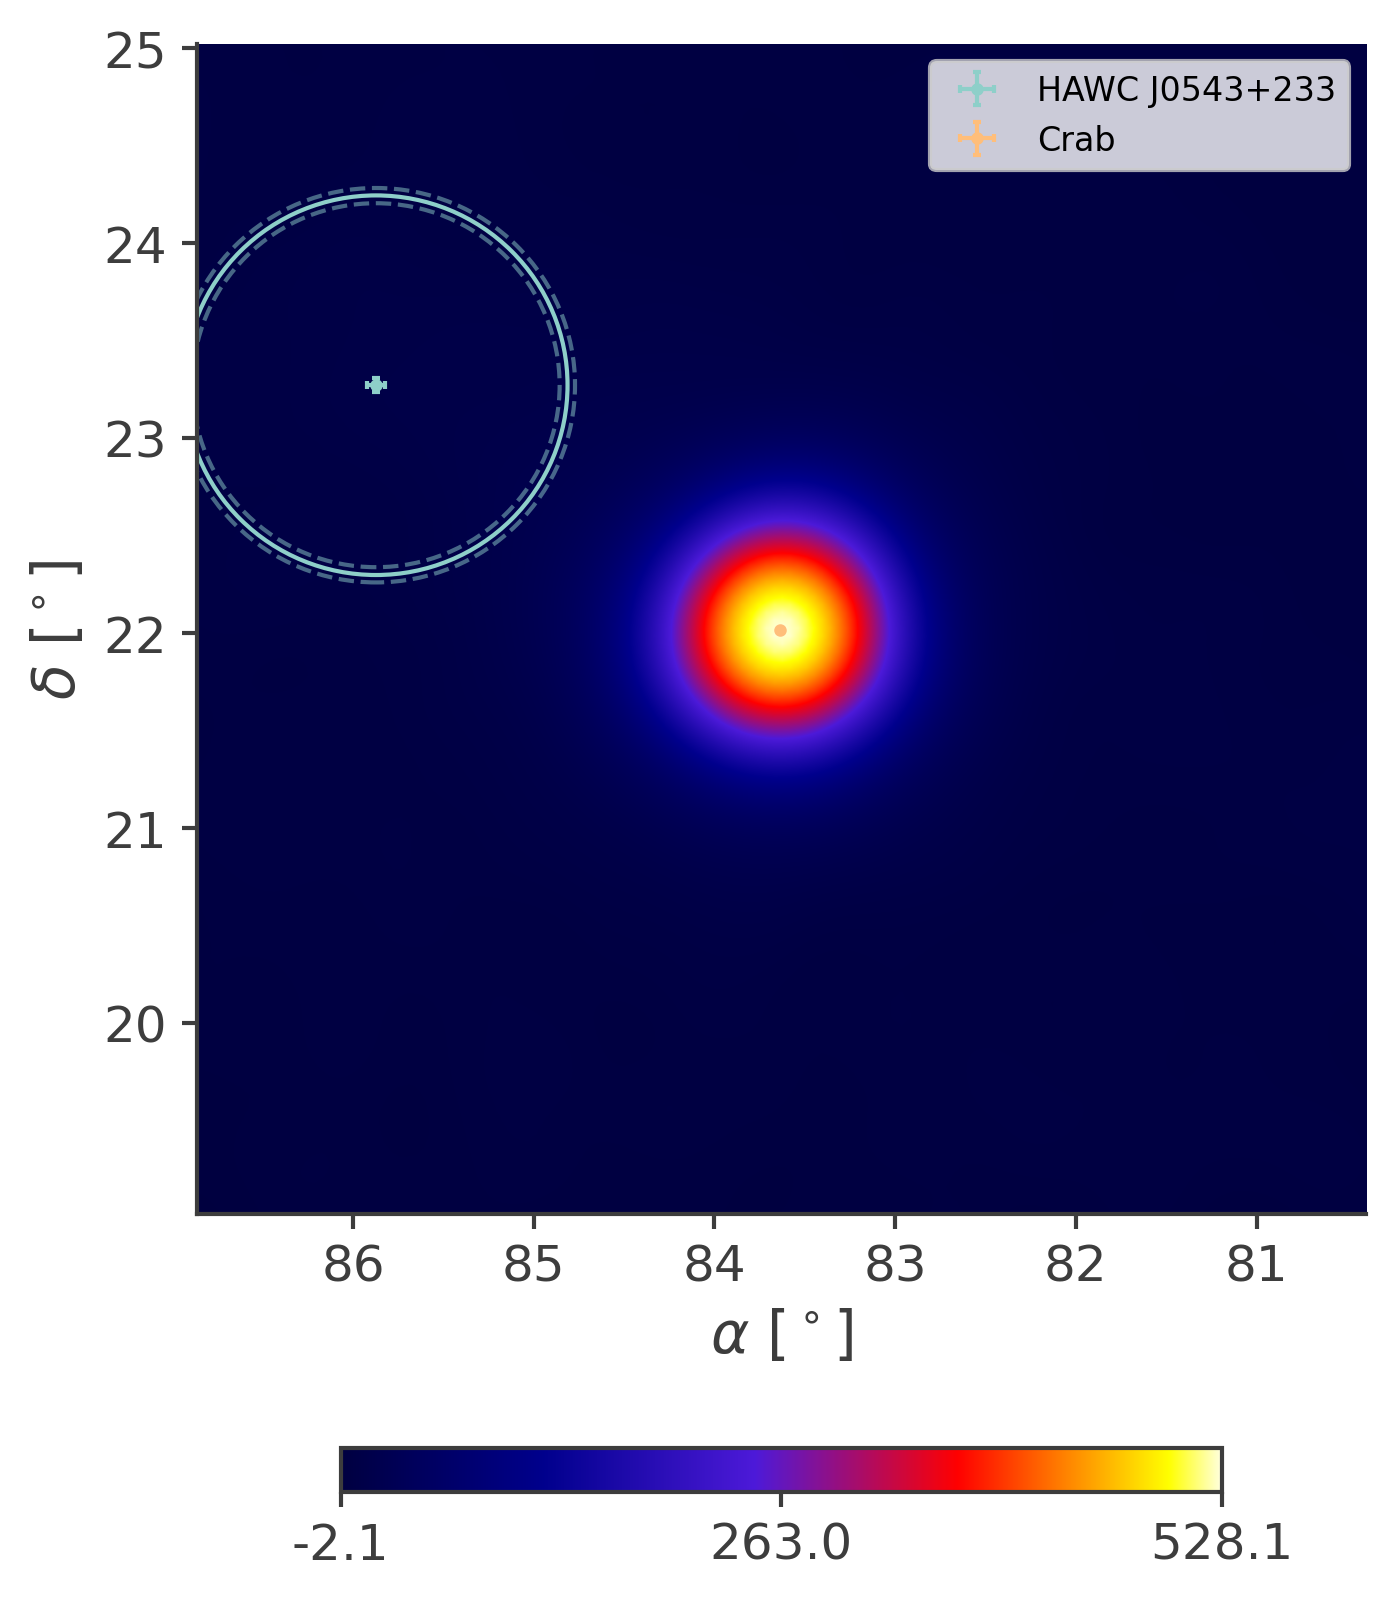

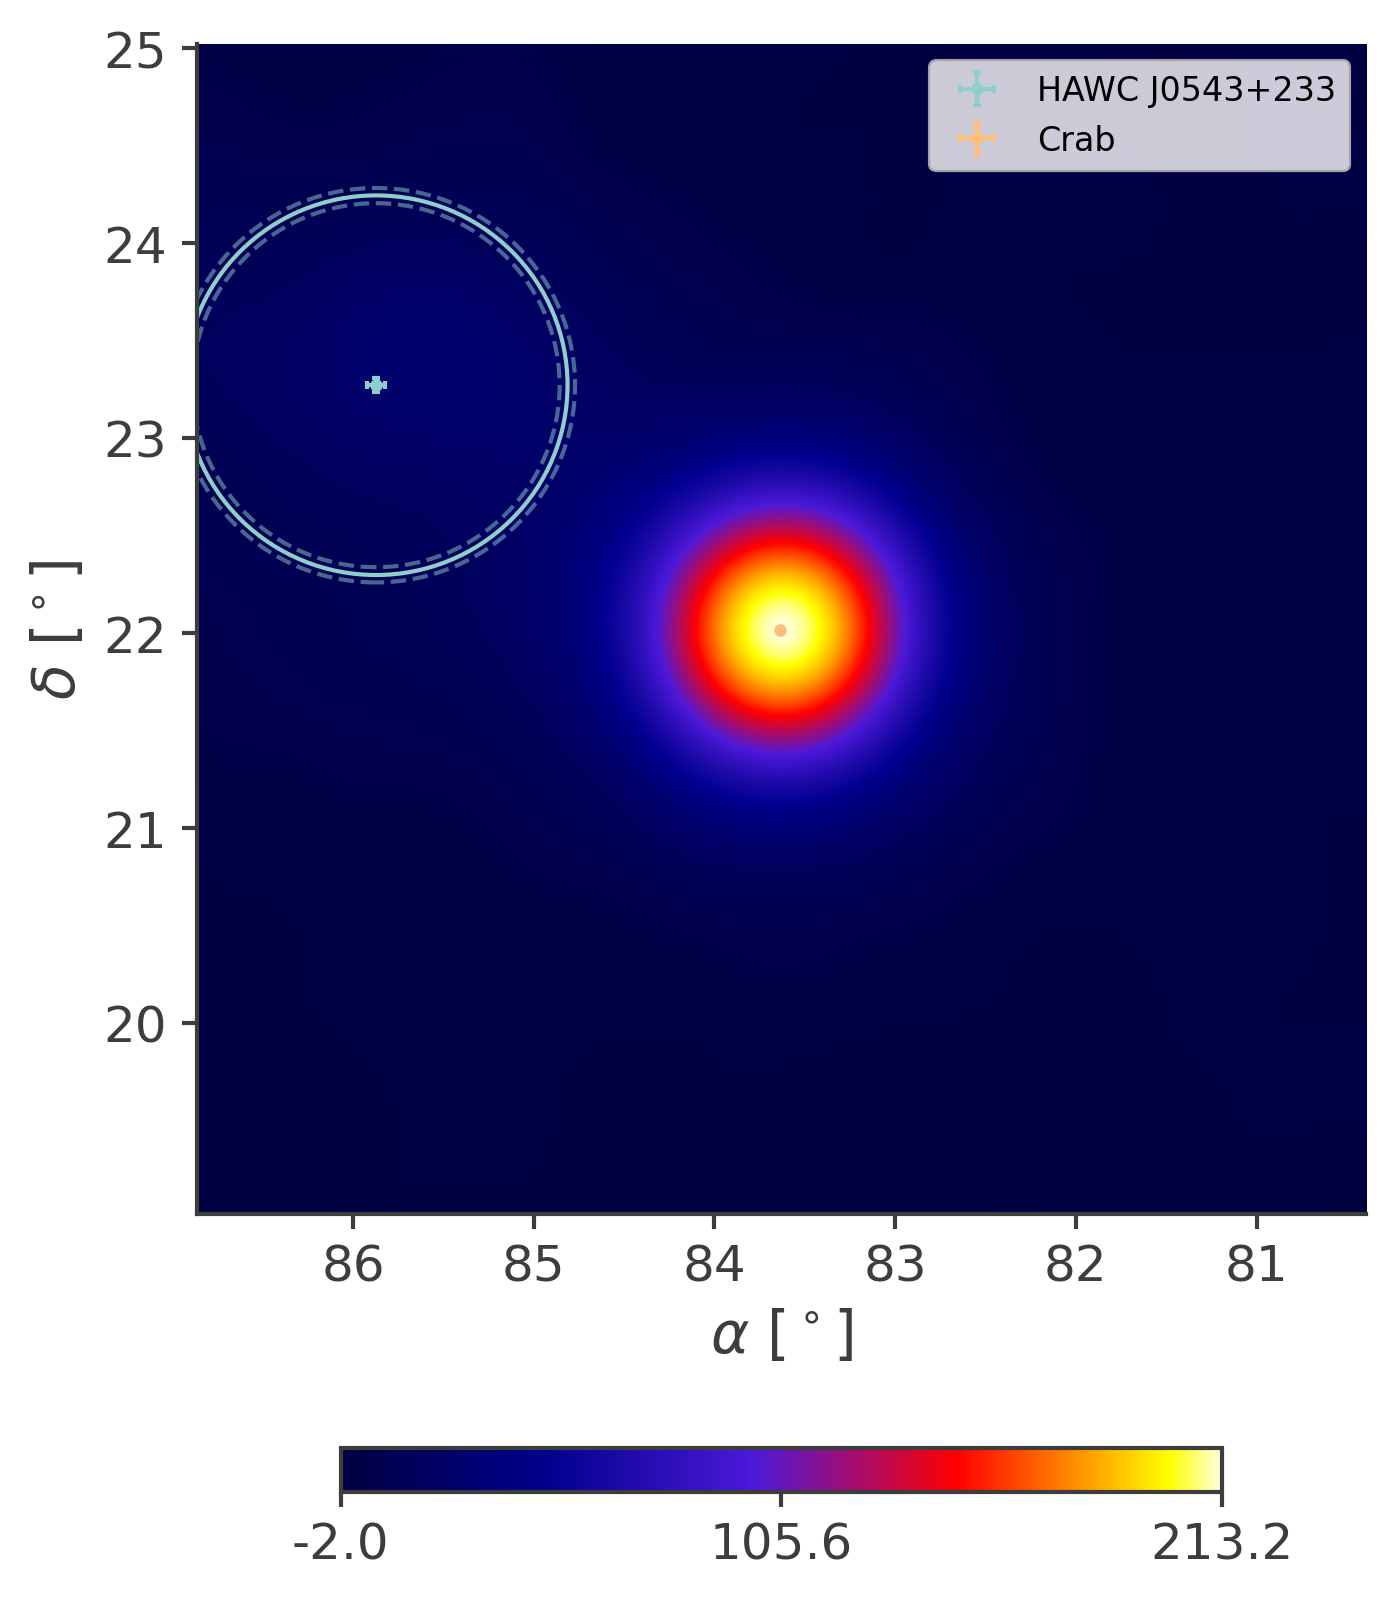

In [11]:
%matplotlib inline
sources = my.get_sources(lm,result)
sources["HAWC J0543+233"]=sources.pop("ext1")
sources["Crab"]=sources.pop("crab")
sources.pop("Diffuse")  # Diffuse is not a point source, so it is not displayed in the map.
# sources={}
map2, skymapHeader = hp.read_map("../../data/fullsky_WCDA_20240731_0-6_2.6.fits.gz",h=True)
map2 = hp.ma(map2)
fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=6, contours=[1000],save=True, cat={})
plt.legend()

map2, skymapHeader = hp.read_map("../../data/fullsky_KM2A_20240731_4-13_3.6.fits.gz",h=True)
map2 = hp.ma(map2)
fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=6, contours=[1000],save=True, cat={})
plt.legend()

Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(1.086 +/- 0.011) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2280.768739
total,2280.768739


Values of statistical measures:

,statistical measures
AIC,4563.537494
BIC,4573.930971


0 0 9491.622666358948 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(1.164 +/- 0.007) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2459.565121
total,2459.565121


Values of statistical measures:

,statistical measures
AIC,4921.130259
BIC,4931.523736


1 0 29535.470141768456 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(1.175 +/- 0.005) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2642.04612
total,2642.04612


Values of statistical measures:

,statistical measures
AIC,5286.092257
BIC,5296.485734


2 0 82994.53603515029 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(1.253 +/- 0.008) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2653.110251
total,2653.110251


Values of statistical measures:

,statistical measures
AIC,5308.220518
BIC,5318.613995


3 0 61014.02189559117 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(1.098 +/- 0.008) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2719.456645
total,2719.456645


Values of statistical measures:

,statistical measures
AIC,5440.913307
BIC,5451.306784


4 0 60231.24076221511 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(1.067 +/- 0.014) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2320.955047
total,2320.955047


Values of statistical measures:

,statistical measures
AIC,4643.910111
BIC,4654.303588


100%|██████████| 6/6 [01:22<00:00, 13.83s/it]


5 0 26508.351237290408 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(6.24 +/- 0.23) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2183.337728
total,2183.337728


Values of statistical measures:

,statistical measures
AIC,4368.675465
BIC,4379.762097


0 0 758.6226673349738 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(8.91 +/- 0.15) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2201.462214
total,2201.462214


Values of statistical measures:

,statistical measures
AIC,4404.924435
BIC,4416.011068


1 0 4114.197119757533 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(9.95 +/- 0.13) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2314.015821
total,2314.015821


Values of statistical measures:

,statistical measures
AIC,4630.031650
BIC,4641.118282


2 0 7158.097689885646 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(1.048 +/- 0.014) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2290.457179
total,2290.457179


Values of statistical measures:

,statistical measures
AIC,4582.914367
BIC,4594.000999


3 0 9048.53038056288 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(1.149 +/- 0.018) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2212.156574
total,2212.156574


Values of statistical measures:

,statistical measures
AIC,4426.313156
BIC,4437.399788


4 0 11818.407568699753 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(1.167 +/- 0.027) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,2131.199905
total,2131.199905


Values of statistical measures:

,statistical measures
AIC,4264.399818
BIC,4275.486450


5 0 8135.239470905857 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(1.24 +/- 0.04) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1962.916884
total,1962.916884


Values of statistical measures:

,statistical measures
AIC,3927.833775
BIC,3938.920408


6 0 5479.863614570197 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(1.41 +/- 0.07) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1577.914428
total,1577.914428


Values of statistical measures:

,statistical measures
AIC,3157.828864
BIC,3168.915497


7 0 3123.963770833616 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(1.51 +/- 0.11) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,973.097423
total,973.097423


Values of statistical measures:

,statistical measures
AIC,1948.194854
BIC,1959.281486


8 0 1307.3656850226134 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(1.41 +/- 0.20) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,459.082766
total,459.082766


Values of statistical measures:

,statistical measures
AIC,920.165539
BIC,931.252172


9 0 372.3086677954552 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(2.0 +/- 0.4) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,241.728672
total,241.728672


Values of statistical measures:

,statistical measures
AIC,485.457351
BIC,496.543984


10 0 161.03267289679206 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(1.8 +/- 0.7) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,131.528911
total,131.528911


Values of statistical measures:

,statistical measures
AIC,265.057831
BIC,276.144463


11 0 44.93775710978332 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(2.8 +/- 1.8) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,60.928183
total,60.928183


Values of statistical measures:

,statistical measures
AIC,123.856374
BIC,134.943007


12 0 22.081457604898958 4


Best fit values:

,result,unit
parameter,,
crab.spectrum.main.Log_parabolaM.K,(0 +/- 5) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,0.089728
total,0.089728


Values of statistical measures:

,statistical measures
AIC,2.179464
BIC,13.266097


13 0 -0.0028983572030671922 4
get upper limit


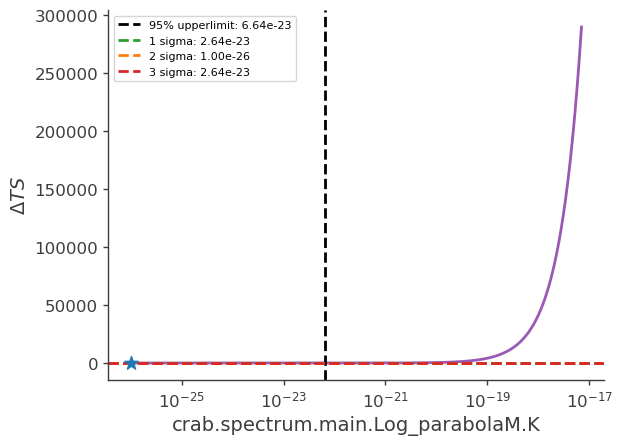

100%|██████████| 14/14 [04:54<00:00, 21.01s/it]


In [12]:
Flux_WCDA, jls1 = my.getdatapoint(WCDA, lm, maptree, response, roi, "crab", scanbin=0, piv=20, spec=my.Log_parabolaM(),ifpowerlawM=1)
# Flux_WCDA2, jls2 = my.getdatapoint(WCDA, lm, maptree, response, roi, "ext1", ifpowerlawM=1)
Flux_WCD3, jls3 = my.getdatapoint(KM2A, lm, maptree2, response2, roi, "crab", scanbin=0, piv=20, spec=my.Log_parabolaM(),ifpowerlawM=1)
# Flux_WCDA4, jls4 = my.getdatapoint(KM2A, lm, maptree2, response2, roi, "ext1", ifpowerlawM=1)
# Flux_WCDA3 = my.getdatapoint(WCDA, lm, maptree, response, roi, "crab2")

16:42:41 WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 84.5.   ]8;id=16491;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=860667;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 22.5.   ]8;id=52337;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=268911;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 3.0.  ]8;id=134892;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=531506;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 1e-17.     ]8;id=486689;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=562044;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=994819;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=62997;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  3.3000000000000003e-19.                                                                          

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 84.5.   ]8;id=796521;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=42621;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 22.5.   ]8;id=29586;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=372970;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 3.0.  ]8;id=609232;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=632451;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum 1e-17.     ]8;id=792195;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=240364;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=352041;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=838129;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  3.3000000000000003e-19.                                                                          

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



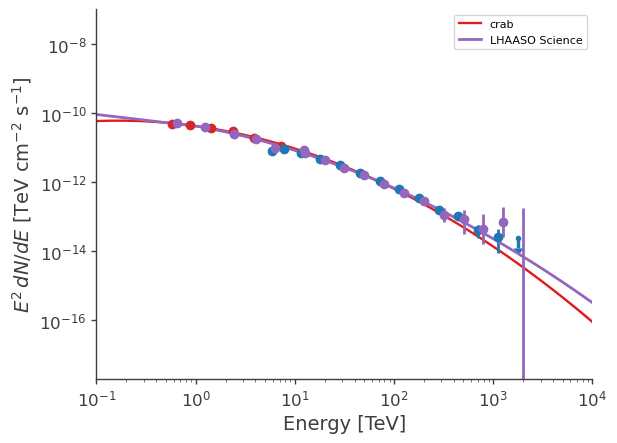

In [13]:
%matplotlib inline
x_Max=10000.
x_Min=.1
y_Min=0.2e-17
y_Max=1e-7
fig,ax = plt.subplots()
plot_spectra(
    result[0].results,
    sources_to_use=["crab"],
    include_extended=True,
    ene_min=x_Min,
    ene_max=x_Max,
    num_ene=100,
    energy_unit="TeV",
    flux_unit="TeV/(s cm2)",
    subplot=ax
    )

my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA,"","tab:red")
my.Draw_sepctrum_points(region_name, Modelname, Flux_WCD3,"","tab:blue")
# my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA3,"Crab_data2","tab:blue")
# my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA2,"","tab:blue")

e_J0248=np.linspace(x_Min,x_Max,10000)
crab_data = np.array([[0.645589, 4.99911e-11, 5.2533e-12],
[1.23979, 3.89817e-11, 2.24529e-12],
[2.42276, 2.40127e-11, 1.76418e-12],
[4.06902, 1.73829e-11, 1.68635e-12],
[6.35322, 9.85614e-12, 1.47362e-12],
[12.3595, 8.32206e-12, 8.84423e-13]])

crab_data_km2a = np.array([
[12.59, 6.78e-12,  2.90e-13,  2.90e-13],
[19.95, 4.21e-12,  1.76e-13,  1.76e-13],
[31.62, 2.55e-12,  1.16e-13,  1.16e-13],
[50.12, 1.59e-12,  1.00e-13,  1.00e-13],
[79.43, 8.94e-13,  7.54e-14,  7.54e-14],
[125.89, 4.67e-13,  6.46e-14,  6.46e-14],
[199.53, 2.84e-13,  6.04e-14,  6.04e-14],
[316.23, 1.10e-13,  4.12e-14,  6.22e-14],
[501.19, 8.55e-14,  5.42e-14,  6.67e-14],
[794.33, 4.33e-14,  2.74e-14,  7.65e-14],
[1258.93,  6.83e-14 , 4.30e-14 , 1.20e-13],
[1995.26,  -2.12e-16,  0.00e+00,  1.73e-13]])
flux_J0248_sci=e_J0248**2*8.2e-14*pow(e_J0248/10,-2.9-0.19*np.log10(e_J0248/10))
plt.errorbar(crab_data[:,0], crab_data[:,1], crab_data[:,2],fmt="o", c = "tab:purple") #,label='Crab Science'
plt.errorbar(crab_data_km2a[:,0], crab_data_km2a[:,1], [crab_data_km2a[:,2], crab_data_km2a[:,3]],fmt="o", c = "tab:purple") 
plt.plot(e_J0248,flux_J0248_sci,label='LHAASO Science', c = "tab:purple")

# LHAASO_sensitivity = np.genfromtxt("./LHAASO_sensitivity.csv",delimiter=',')
# plt.plot(LHAASO_sensitivity[:,0],LHAASO_sensitivity[:,1]*1e-11,label="LHAASO 1yr", c="black")

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
plt.legend()
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')

In [11]:
f1 = Flux_WCDA[0][3]*1e9*Flux_WCDA[0][0]**2
e1 = Flux_WCDA[0][0]
f2=Flux_WCDA[0][0]**2*8.2e-14*pow(Flux_WCDA[0][0]/10,-2.9-0.19*np.log10(Flux_WCDA[0][0]/10))
print(e1, f1, f2, (f2-f1)/f2)

0.9494132728713738 3.911303316679918e-11 4.319570105494919e-11 0.09451560660993681


In [12]:
#About 5 min
smoothsigma=[0.4123, 0.3111, 0.2476, 0.2064, 0.1633, 0.1379, 0.2896, 0.2594, 0.2152, 0.189, 0.1561, 0.14]#The first six bins are normal, and the following ones are merged bins, representing the total (merged), without the first bin, and without the first two bins, respectively.
maps = my.getmap(WCDA,roi,"Crab",
                 modelindex=[1,1], # modelindex: pt and ext number
              #  pta=[0], exta=[0],
                   stack=[1.010229, 1.020917, 1.040597, 1.064803, 1.090451, 1.130015], #Combine bins with all bin based on signal-to-noise ratio.
                  #  stack=[0, 0, 1.002131,1.005977,1.002093,1.004078], #Combine bins with nhit >= 200 based on signal-to-noise ratio.
                  #  stack=[0, 1.002131,1.005977,1.002093,1.004078],
                   smoothsigma=smoothsigma
                   #, binc=["1","2","3","4","5"]
                   )
smapall = my.smoothmap(maps[-1], smooth_sigma=0.2896)

100%|██████████| 23950/23950 [00:00<00:00, 94371.26it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 64791.41it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 66117.07it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 79610.89it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 80675.89it/s]


Mask all


100%|██████████| 23950/23950 [00:00<00:00, 79249.88it/s]


Mask all


100%|██████████| 11/11 [00:06<00:00,  1.80it/s]


Set stack_sigma automatelly!!!


100%|██████████| 23950/23950 [00:00<00:00, 413479.40it/s]


Smooth Sig
Smooth bkg
Smooth Modelbkg
Mask all


100%|██████████| 5/5 [00:00<00:00,  7.99it/s]


get ring pixnum: 100%|██████████| 19/19 [00:00<00:00, 118942.95it/s]


compute ring: 100%|██████████| 19/19 [00:00<00:00, 113359.57it/s]


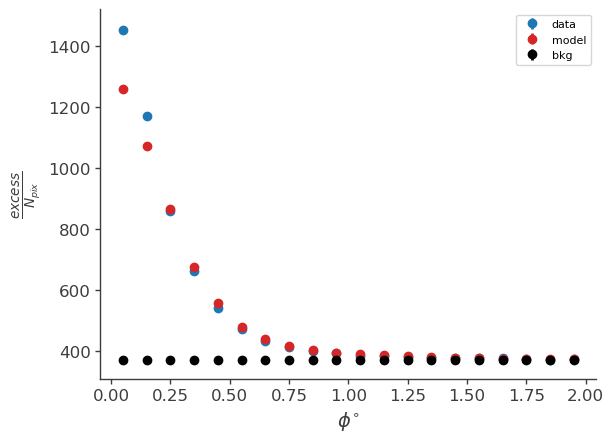

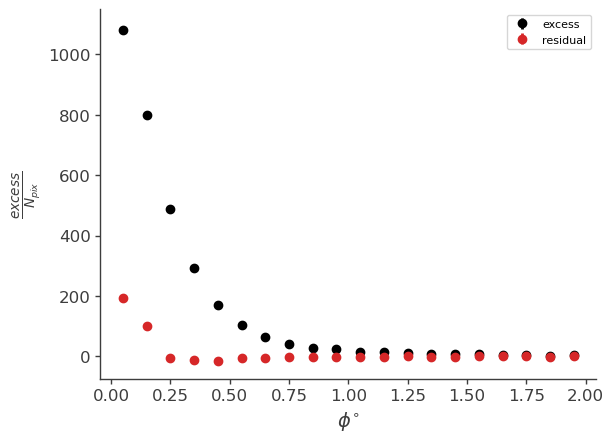

In [13]:
%matplotlib inline
psfdata = my.Draw_lateral_distribution(region_name, Modelname, maps[-1], 83.622, 22.002, 20, 0.1, True)

************************
[ 1.30998789e+03 -2.87761560e-02  1.26323852e+00]
************************
max Significance= 11.7
LHAASO:  1 83.62 22.01 1LHAASO J0534+2200u    Crab                  (0.01) 0.0
LHAASO:  2 86.07 23.19  1LHAASO J0542+2311u     1.45
TeVCat:  1 80.43749999999999 21.214277777777777 VER J0521+211 0.0
TeVCat:  2 83.62874999999998 22.01236111111111 Crab 0.0145
TeVCat:  3 83.63291666666665 22.0145 Crab Pulsar 0.0
TeVCat:  4 85.77999999999999 23.4 HAWC J0543+233 0.5
PSR:  1 79.29166666666666 22.266666666666666 J0517+22
PSR:  2 82.21774999999998 22.00111111111111 J0528+2200
PSR:  3 83.63320833333333 22.01447222222222 J0534+2200
PSR:  4 85.79025 23.484722222222224 J0543+2329
PSR:  5 86.61983333333332 24.689166666666665 J0546+2441
SNR:  1 83.62916666666665 22.016666666666666 G184.6-05.8
3FHL:  1 80.44172 21.213364 3FHL J0521.7+2112
3FHL:  2 83.634834 22.019203 3FHL J0534.5+2201
3FHL:  3 84.06884 17.566227 3FHL J0536.2+1733
4FGL:  1 79.9457 19.6646 4FGL J0519.7+1939
4FGL:  2

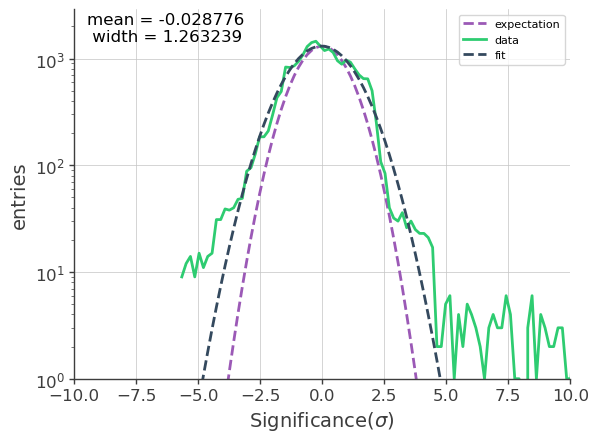

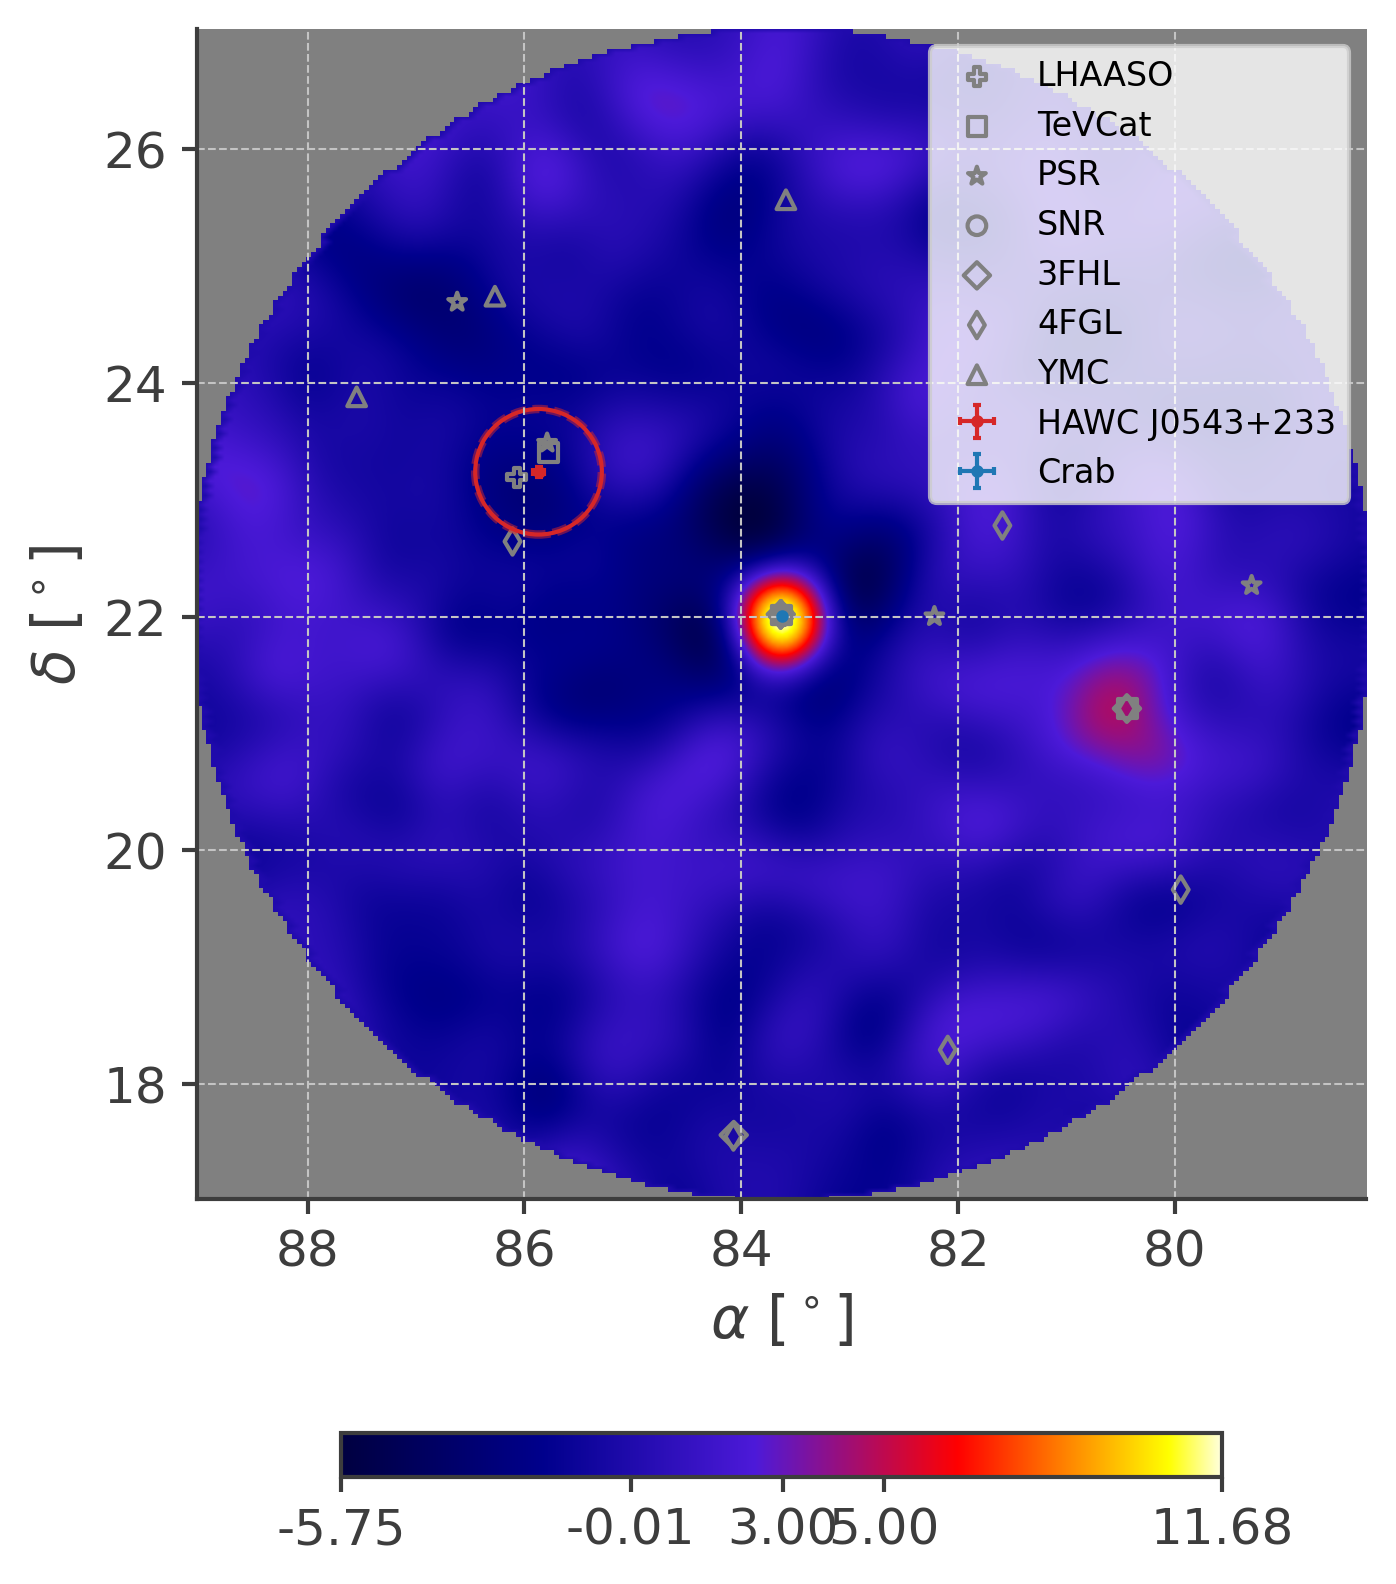

In [14]:
%matplotlib inline
res=True # Do you want resmap? or org map.
saven = "Significance"
if res:
    saven+="_res"
sigmap = my.getsigmap(region_name, Modelname, [smapall],i=0,signif=17,res=res,name="Crab")
fig = my.drawmap(region_name, Modelname, sources, sigmap, ra1, dec1, rad=2*data_radius, contours=[1000],save=True,savename=saven)
#There is another source around crab, so you can try another model: 1pt+1gaus maybe?

In [17]:
# If you want to get residual llh map, you need a new rootfile.
my.write_resmap(region_name, Modelname, WCDA, roi, maptree, 
ra1, dec1, "crab_res",
[0],[0], #point source and ext source, if you have 3pt and 2 ext, and you only want sig about pt1, then use [1,0,0],[0, 0], or you only want 2nd ext: [0,0,0],[0,1]
binc="all"
)
# ! The file you got need use Add_UserInfo.cc in ./tools/llh_skymap to add UserInfo

processing at nHit0 0


100%|██████████| 95570/95570 [00:02<00:00, 44573.56it/s]


processing at nHit0 1


100%|██████████| 95570/95570 [00:01<00:00, 53081.69it/s]


processing at nHit0 2


100%|██████████| 95570/95570 [00:01<00:00, 53080.10it/s]


processing at nHit0 3


100%|██████████| 95570/95570 [00:01<00:00, 49763.00it/s]


processing at nHit0 4


100%|██████████| 95570/95570 [00:01<00:00, 49263.01it/s]


processing at nHit0 5


100%|██████████| 95570/95570 [00:01<00:00, 54724.29it/s]
